In [1]:
#======================================
# 2-Way Splitting
#======================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/nutrients_csvfile.csv")
print("✅ Dataset Loaded Successfully!")
print(data.shape)
display(data.head())

Mounted at /content/drive
✅ Dataset Loaded Successfully!
(335, 10)


,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [4]:
numeric_cols = ['Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat', 'Fiber', 'Carbs']

def clean_numeric_columns(df, cols):
    for col in cols:
        df[col] = (
            df[col].astype(str)
            .str.replace(r'[^0-9.\-]', '', regex=True)  # ✅ Raw string - safe and warning-free
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

data = clean_numeric_columns(data, numeric_cols)
data = data.dropna(subset=numeric_cols)
data = data.drop_duplicates()

print("✅ Cleaned Data Shape:", data.shape)

✅ Cleaned Data Shape: (171, 10)


In [5]:
# ============================================================
# Create Classification Target — High vs Low Protein
# ============================================================
median_protein = data['Protein'].median()
data['Protein_Level'] = np.where(data['Protein'] >= median_protein, 'High', 'Low')

print("Median Protein Value:", median_protein)
print(data['Protein_Level'].value_counts())


Median Protein Value: 8.0
Protein_Level
High    88
Low     83
Name: count, dtype: int64


In [6]:
X = data.drop(columns=['Protein', 'Protein_Level', 'Food', 'Measure', 'Category'])
y = data['Protein_Level']

# Encode target labels (Low=0, High=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features and Target Prepared!")
print("Feature Matrix Shape:", X_scaled.shape)

✅ Features and Target Prepared!
Feature Matrix Shape: (171, 6)


In [7]:
# ============================================================
# 2-Way Train/Test Split
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


Training Samples: 136
Testing Samples: 35


In [8]:
# ============================================================
# Train Model and Predict
# ============================================================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Model Training Complete!")


✅ Model Training Complete!


In [9]:
# ============================================================
# Evaluate the Model
# ============================================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))



📊 Model Performance:
Accuracy:  0.714
Precision: 0.706
Recall:    0.706
F1-Score:  0.706

Classification Report:

              precision    recall  f1-score   support

         Low       0.72      0.72      0.72        18
        High       0.71      0.71      0.71        17

    accuracy                           0.71        35
   macro avg       0.71      0.71      0.71        35
weighted avg       0.71      0.71      0.71        35



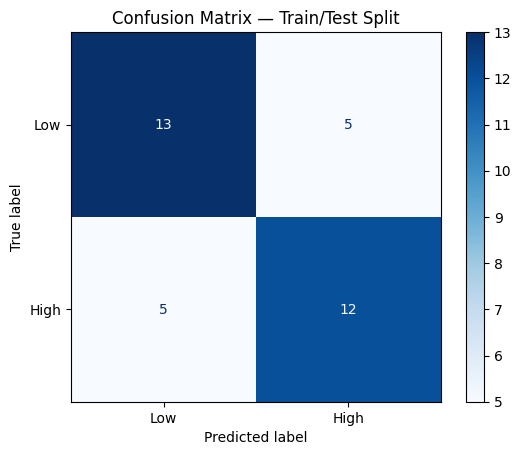

In [10]:
# ============================================================
# Confusion Matrix
# ============================================================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix — Train/Test Split")
plt.show()


/tmp/ipython-input-249940526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='mako')


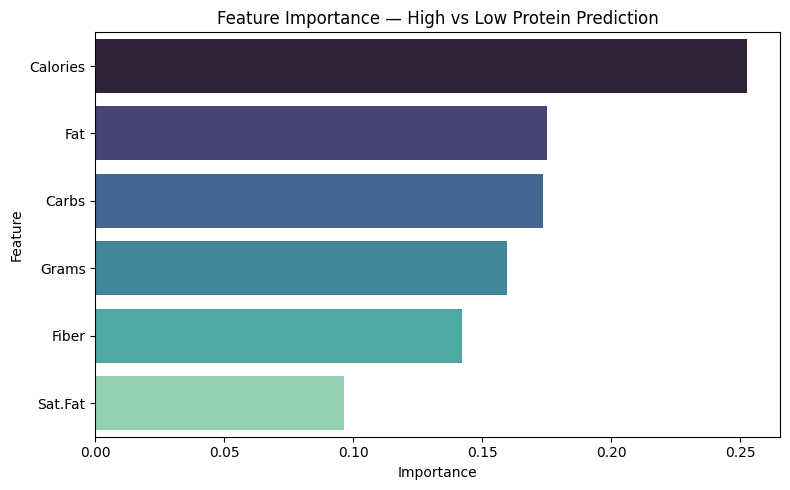

In [11]:

importances = model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='mako')
plt.title("Feature Importance — High vs Low Protein Prediction")
plt.tight_layout()
plt.show()
